In [5]:
### getting the stats of baby cries and the other data  ###

import os
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# loop through each cell of the data, finding the number of instances total, distribution of male/female, age distribution, and why the baby was crying
path = "/home/benjamin.lambright/Desktop/ugrip/Dannings_code/donateacry_corpus_cleaned_and_updated_data"

reasons = Counter()
ages = Counter()
genders = Counter()


for root, dirs, files in os.walk(path):
    for file in files:
        # cut the file by the end
        if file.endswith(".wav"):
            # slice to next dash (cry type)
            reasons[file[-6:-4]] += 1
            # then to next dash (age)
            ages[file[-9:-7]] += 1
            # then to next dash (gender)
            genders[file[-11]] += 1


In [30]:
def plot_baby_characteristics(counter, key_mapping, color, titlename):
    renamed_counter = Counter({key_mapping.get(key, key): count for key, count in counter.items()})

    labels, counts = zip(*renamed_counter.items())

    # Creating the plot
    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=color)
    # plt.xlabel('Reasons')
    plt.ylabel('Counts')
    plt.title(titlename)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()


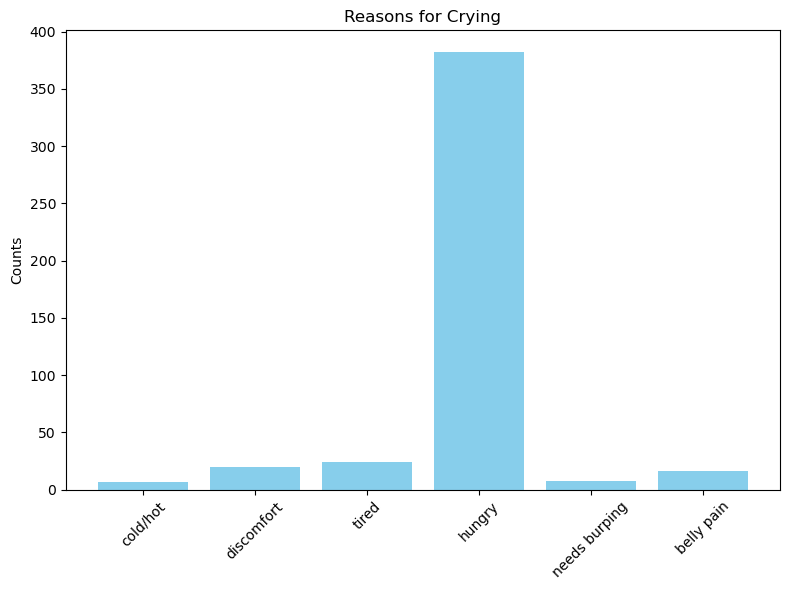

In [24]:
reasons_mapping = {"ch": "cold/hot", "dc": "discomfort", "ti": "tired", "hu": "hungry", "bu": "needs burping", "bp": "belly pain"}
plot_baby_characteristics(reasons, reasons_mapping, "skyblue", "Reasons for Crying")

Counter({'2 to 6 months old': 162, '0 to 4 weeks old': 149, '7 months to 2 years old': 81, '4 to 8 weeks old': 55, 'more than 2 years old': 10})


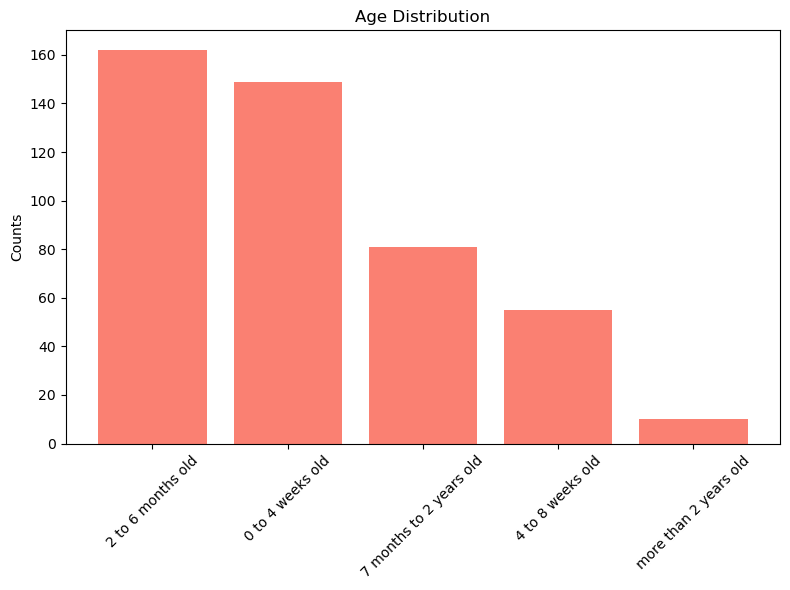

In [31]:
age_mapping = {
    "04": "0 to 4 weeks old",
    "48": "4 to 8 weeks old",
    "26": "2 to 6 months old",
    "72": "7 months to 2 years old",
    "22": "more than 2 years old"
}
plot_baby_characteristics(ages, age_mapping, "salmon", "Age Distribution")

Counter({'m': 276, 'f': 181})
Counter({'male': 276, 'female': 181})


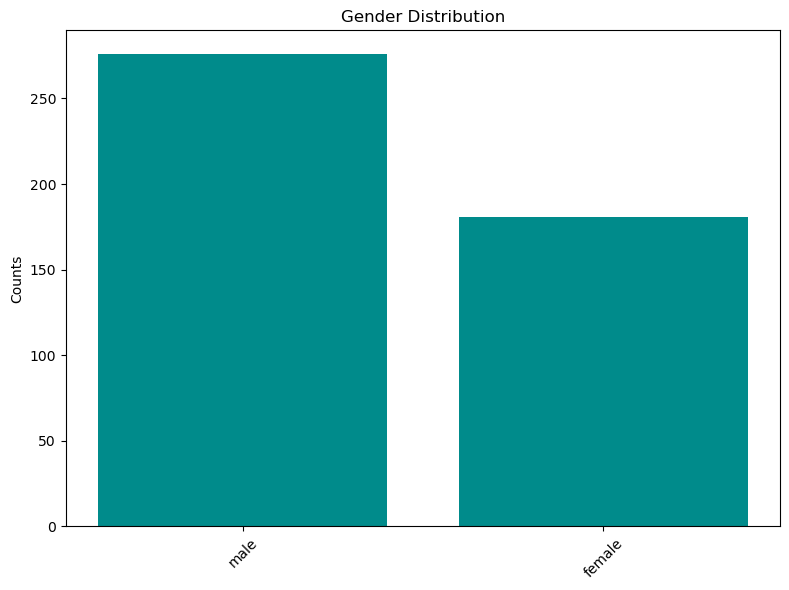

In [32]:
gender_mapping = {"m": "male", "f": "female"}
print(genders)
plot_baby_characteristics(genders, gender_mapping, "darkcyan", "Gender Distribution")